In [3]:
import celltypist
from celltypist import models
import scanpy as sc
import pandas as pd 
import numpy as np
import anndata
import re
import h5py
import scipy.sparse as scs
import concurrent.futures
import scanpy.external as sce
import gc
import harmonypy
from concurrent.futures import ThreadPoolExecutor

In [16]:
adata = sc.read_h5ad('/home/jupyter/Myeloid_cells/files/IL1B_CD14_Mono_ONLY_FluYr1D0_parallel.h5ad')

In [17]:
adata.obs.columns

Index(['barcodes', 'batch_id', 'cell_name', 'cell_uuid', 'chip_id',
       'hto_barcode', 'hto_category', 'n_genes', 'n_mito_umis', 'n_reads',
       'n_umis', 'original_barcodes', 'pbmc_sample_id', 'pool_id',
       'seurat_pbmc_type', 'seurat_pbmc_type_score', 'umap_1', 'umap_2',
       'well_id', 'subject.biologicalSex', 'subject.ethnicity',
       'subject.partnerCode', 'subject.race', 'subject.subjectGuid',
       'cohort.cohortGuid', 'sample.visitName', 'sample.visitDetails',
       'subject.birthYear', 'CMV.IgG.Serology.Result.Interpretation', 'BMI',
       'predicted_doublet', 'doublet_score', 'AIFI_L1', 'AIFI_L2', 'AIFI_L3',
       'AIFI_L3.5', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes',
       'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',
       'pct_counts_in_top_500_genes', 'total_counts_mito',
       'log1p_total_counts_mito', 'pct_counts_mito', 'leiden_resolution_0.5',
       'l

In [18]:
#CD14_naive_subset = adata_subset[adata_subset.obs['labeled_lv2'].isin(['CD14 mono'])]

In [ ]:
adata=adata.raw.to_adata()
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.tl.rank_genes_groups(adata, 'leiden_resolution_0.5', method='wilcoxon')

df_resolution_1=sc.get.rank_genes_groups_df(adata,group=None)
df_resolution_1.to_csv('/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/IL1B_CD14_mono_cluster_top30_DEG.csv')

#sc.tl.rank_genes_groups(adata_subset, 'leiden_resolution_1.5', method='wilcoxon')
#df_resolution_1_5=sc.get.rank_genes_groups_df(adata_subset,group=None)
#df_resolution_1_5.to_csv('/home/jupyter/Myeloid_cells/files/CD14_res1.csv')

#sc.tl.rank_genes_groups(adata_subset, 'leiden_resolution_2', method='wilcoxon')
#df_resolution_2=sc.get.rank_genes_groups_df(adata_subset,group=None)
#df_resolution_2.to_csv('/home/jupyter/Myeloid_cells/files/Cluster_46_res2.csv')

#sc.tl.rank_genes_groups(adata_subset, 'leiden_resolution_3', method='wilcoxon')
#df_resolution_2=sc.get.rank_genes_groups_df(adata_subset,group=None)
#df_resolution_2.to_csv('/home/jupyter/Myeloid_cells/files/Cluster_46_res3.csv')

# DEG Plot generation

In [10]:
df=pd.read_csv('/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/IL1B_CD14_mono_cluster_top30_DEG.csv')

In [4]:
df=pd.read_csv('/home/jupyter/Myeloid_cells/files/IL1B_CD14_Mono_res0.5.csv')

In [11]:
df=df.groupby('group').head(30).reset_index(drop=True)

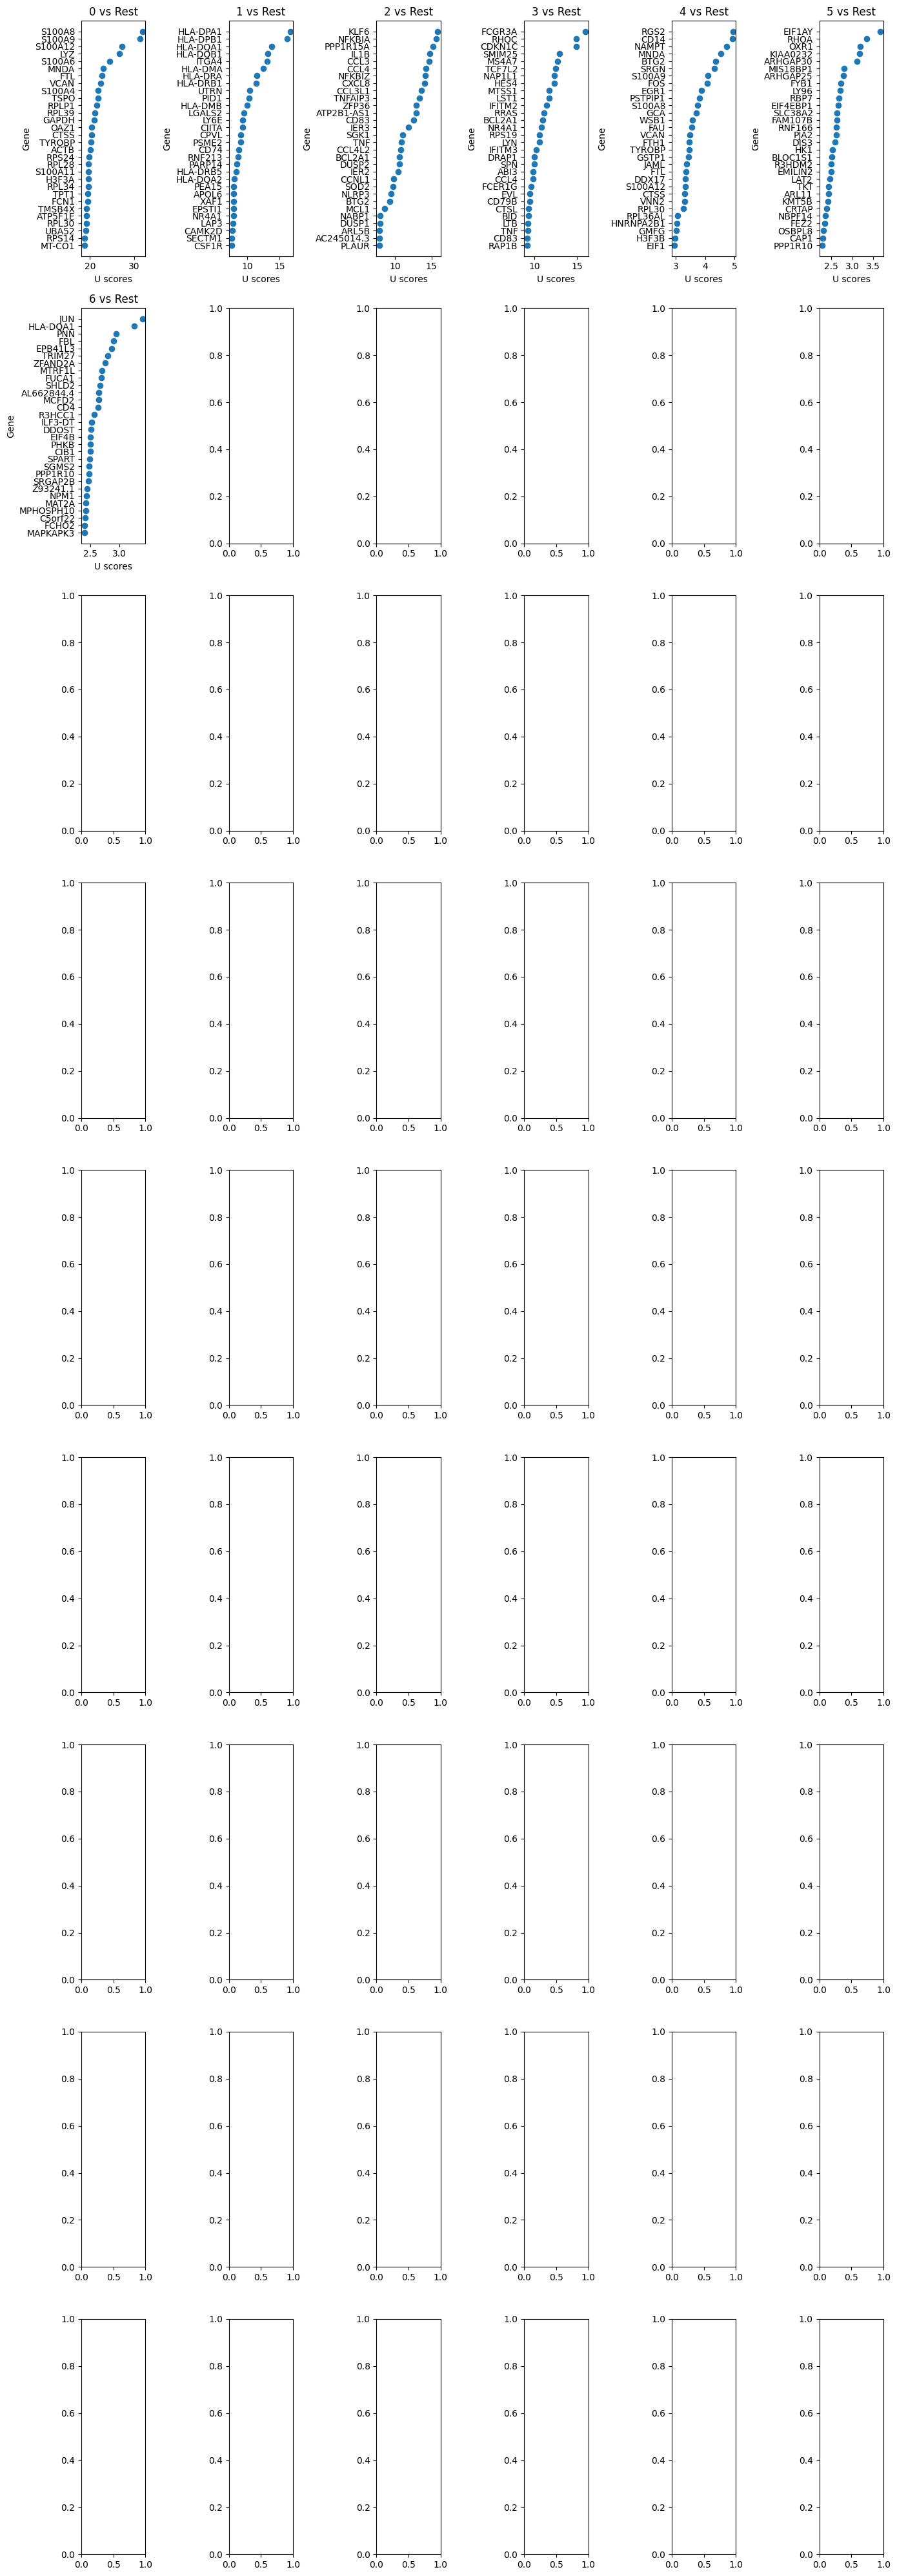

In [13]:


import matplotlib.pyplot as plt

groups = df.groupby('group')

fig, axs = plt.subplots(9, 6, figsize=(14, 40), squeeze=False)

# Loop through each group and create a scatter plot in the corresponding subplot
for i, (name, group) in enumerate(groups):
    row, col = i // 6, i % 6
    axs[row, col].scatter(group['scores'], group['names'])
    axs[row, col].invert_yaxis()
    axs[row, col].set_title(str(name)+" vs Rest")
    axs[row, col].set_xlabel('U scores')
    axs[row, col].set_ylabel('Gene')
fig.tight_layout()
plt.savefig('scatter_plot.png')

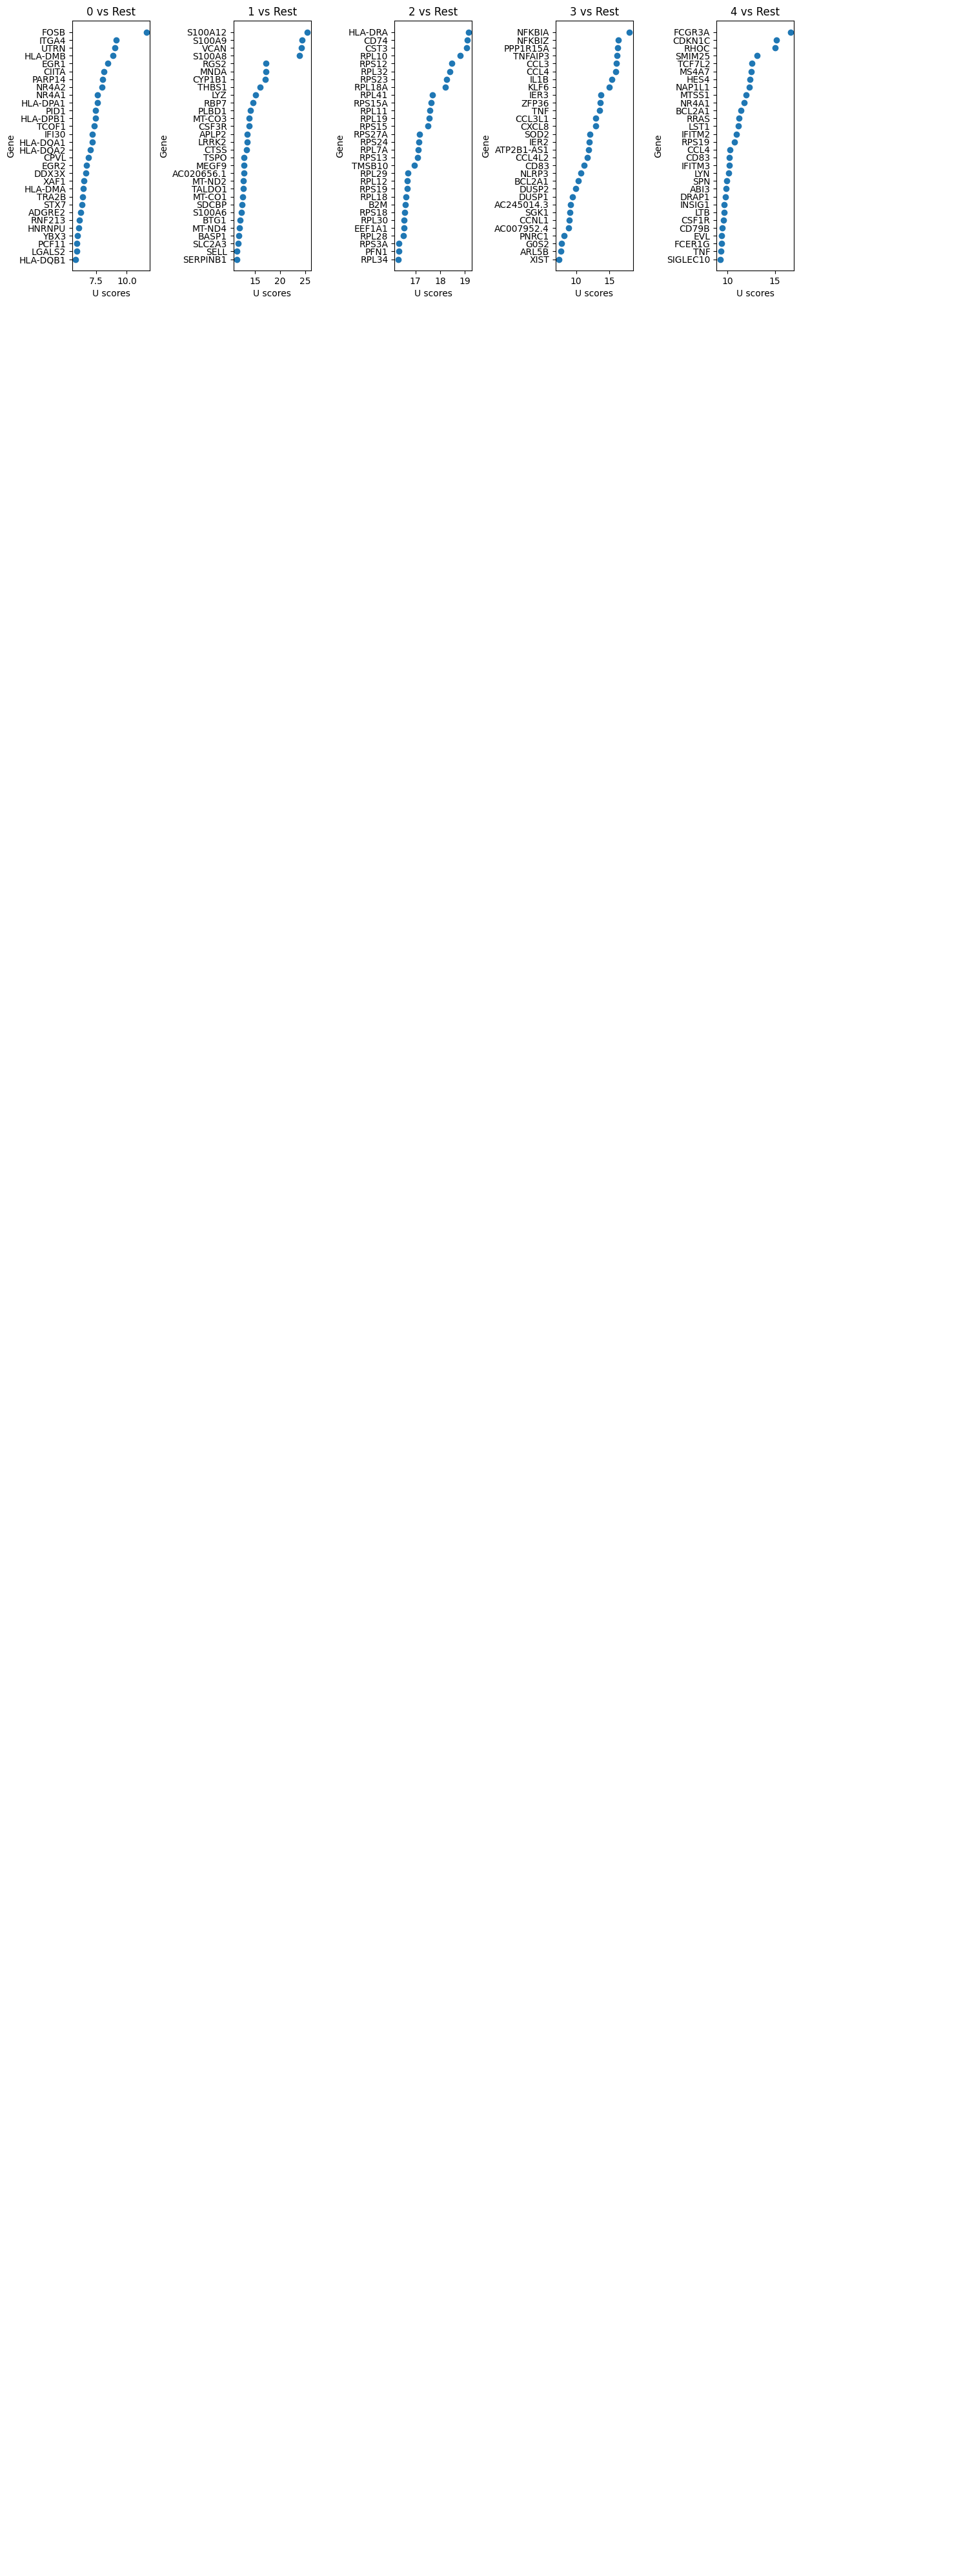

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the DataFrame from the CSV file
df = pd.read_csv('/home/jupyter/Myeloid_cells/files/IL1B_CD14_Mono_res0.5.csv')

# Sort the DataFrame based on some criteria (e.g., gene scores)
df_sorted = df.sort_values(by='scores', ascending=False)

# Group by 'group' and select the top 30 genes for each group
df_top30 = df_sorted.groupby('group').head(30)

# Create subplots
fig, axs = plt.subplots(9, 6, figsize=(15, 40), squeeze=False)

# Loop through each group and create a scatter plot in the corresponding subplot
for i, (name, group) in enumerate(df_top30.groupby('group')):
    row, col = i // 6, i % 6
    axs[row, col].scatter(group['scores'], group['names'])
    axs[row, col].invert_yaxis()
    axs[row, col].set_title(f'{name} vs Rest')
    axs[row, col].set_xlabel('U scores')
    axs[row, col].set_ylabel('Gene')

# Hide empty subplots
for i in range(len(df_top30['group'].unique()), len(axs.flat)):
    axs.flatten()[i].axis('off')

plt.tight_layout()
plt.savefig('scatter_plot.png')
plt.show()

In [ ]:
# Anotther method